In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
from glob import glob
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
import pandas as pd
import tifffile as tf
import torch

import sys
sys.path.insert(0,'..')
from data_prep import draw, load

In [17]:
# log_file = '/home/brysongray/bmap/data/neurotrack_outputs/simulated_with_artifacts_sac_training_output/simulated_b-0_04-03-25_log.csv'
# log_file = "/nafs/dtward/bryson/data/neurotrack_outputs/simulated_with_artifacts_sac_training_output/simulated_b-0_v2_04-05-25_log.csv"
# log_file = "/home/brysongray/data/neurotrack_data/model_weights/sac_weights/curves_with_artifacts_training_outputs/curves_with_artifacts_06-04-25_log.csv"
log_file = "/home/brysongray/data/neurotrack_data/model_weights/sac_weights/curves_no_artifacts_b-2_training_outputs/curves_no_artifacts_b-2_branch_training_06-10-25_log.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(log_file)

# Convert the DataFrame to a dictionary
# Each column becomes a key in the dictionary
log_dict = df.to_dict()

print(f"Log file loaded with {len(df)} entries and {len(df.columns)} columns")
print(f"Column names: {df.columns.tolist()}")

Log file loaded with 1945 entries and 6 columns
Column names: ['episode', 'image_file', 'num_branches', 'episode_return', 'episode_avg_policy_loss', 'branch_accuracy']


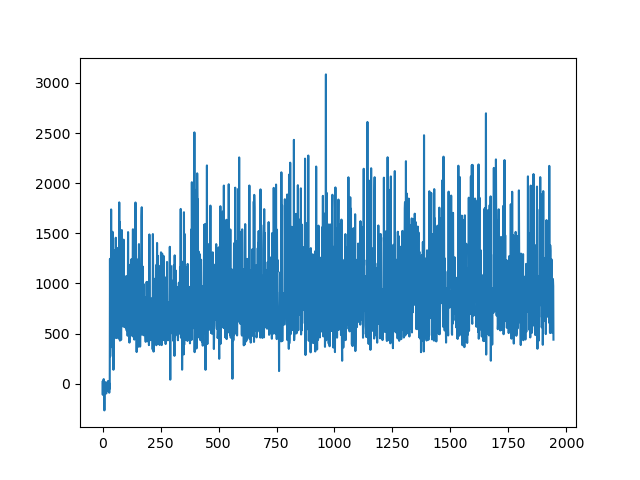

In [19]:
plt.close('all')
episode_returns = list(log_dict['episode_return'].values())
plt.plot(episode_returns)
plt.show()

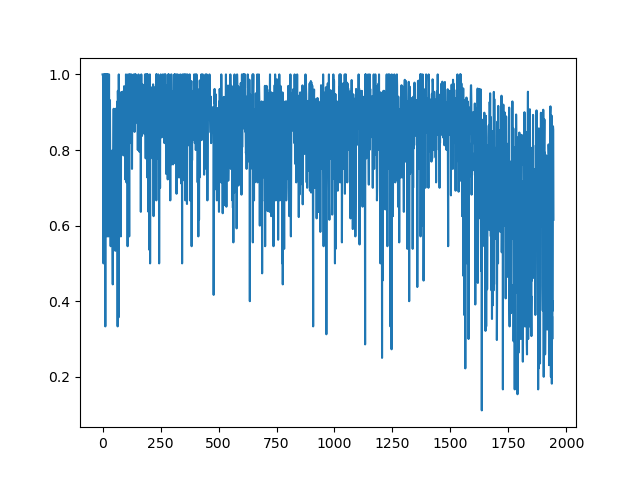

In [18]:
plt.close('all')
episode_accuracies = list(log_dict['branch_accuracy'].values())
plt.plot(episode_accuracies)
plt.show()

In [9]:
img_dir = "/home/brysongray/data/neurotrack_data/simulated_neurons/de-novo/curves_with_artifacts"
img_files = sorted([f for x in os.walk(img_dir) for f in glob(os.path.join(x[0], '*image.tif'))])
density_files = sorted([f for x in os.walk(img_dir) for f in glob(os.path.join(x[0], '*density.tif'))])

idx = 2
img = tf.imread(img_files[idx])
density = tf.imread(density_files[idx])

In [10]:
density.shape

(1, 85, 87, 82)

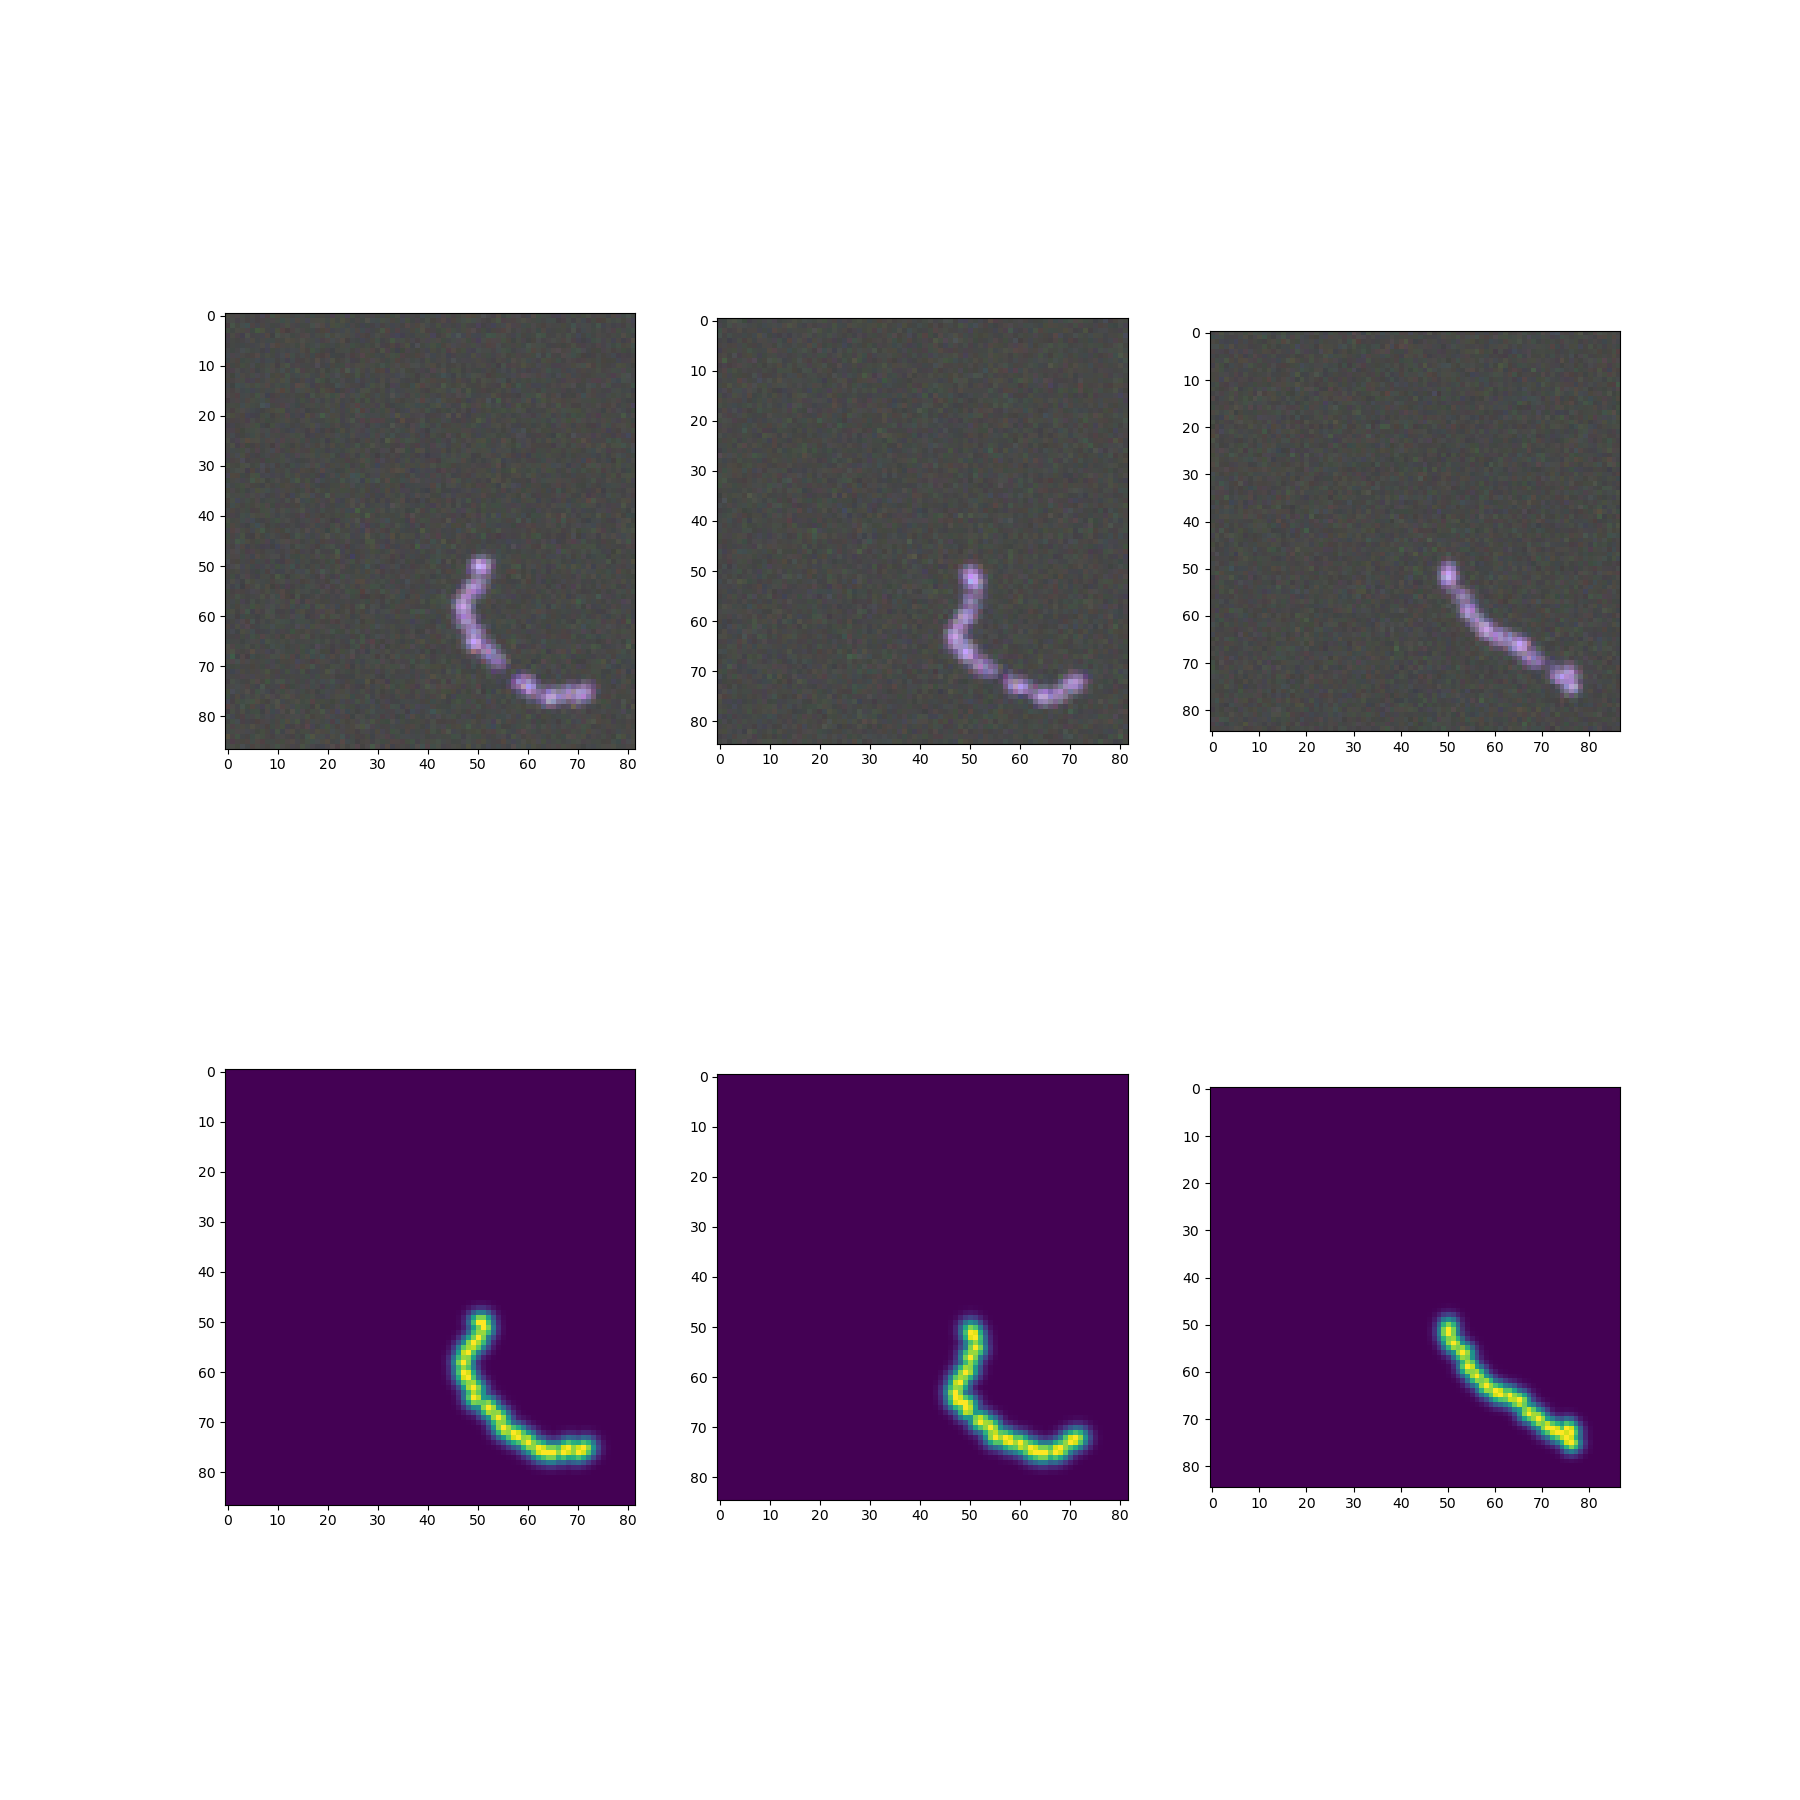

In [11]:
fig, ax = plt.subplots(2,3, figsize=(18,18))
ax[0,0].imshow(img.transpose(1,2,3,0).max(0))
ax[0,1].imshow(img.transpose(1,2,3,0).max(1))
ax[0,2].imshow(img.transpose(1,2,3,0).max(2))
ax[1,0].imshow(density[0].max(0))
ax[1,1].imshow(density[0].max(1))
ax[1,2].imshow(density[0].max(2))


In [33]:
ep_snapshots_path = '/home/bgray/bmap/data/neurotrack_outputs/episode_snapshots_neurom_with_artifacts_01-26-25/'
ep_snapshots_files = sorted([f for x in os.walk(ep_snapshots_path) for f in glob(os.path.join(x[0], '*.pt'))])
# returns_no_artifacts = []
# coverages_no_artifacts = []
# for f in ep_snapshots_files:
#     snapshot = torch.load(f)
#     returns_no_artifacts.append(snapshot['return'])
#     coverages_no_artifacts.append(snapshot['coverage'])

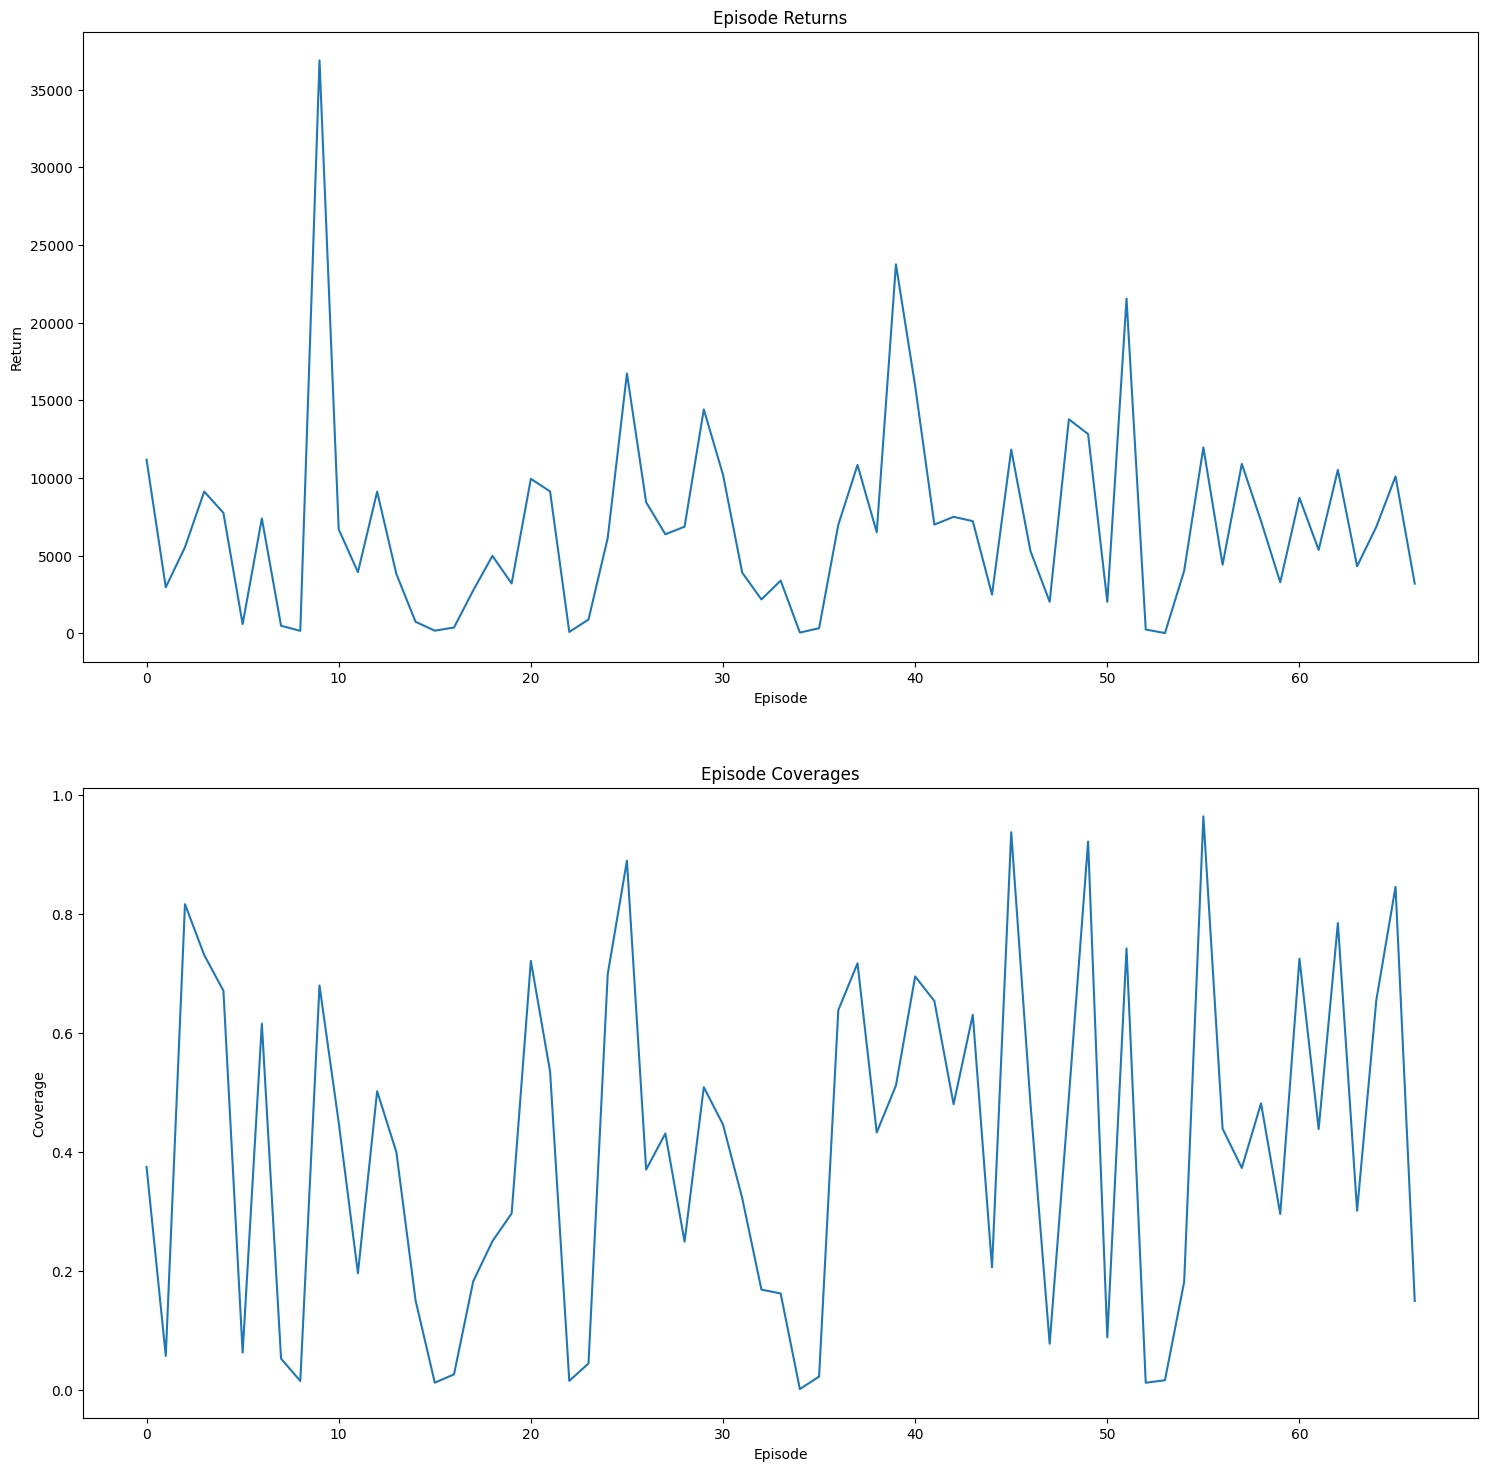

In [11]:
# plot returns and coverages
fig, ax = plt.subplots(2,1, figsize=(18,18))
ax[0].plot(returns)
ax[0].set_title('Episode Returns')
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Return')
ax[1].plot(coverages)
ax[1].set_title('Episode Coverages')
ax[1].set_xlabel('Episode')
ax[1].set_ylabel('Coverage')
plt.show()

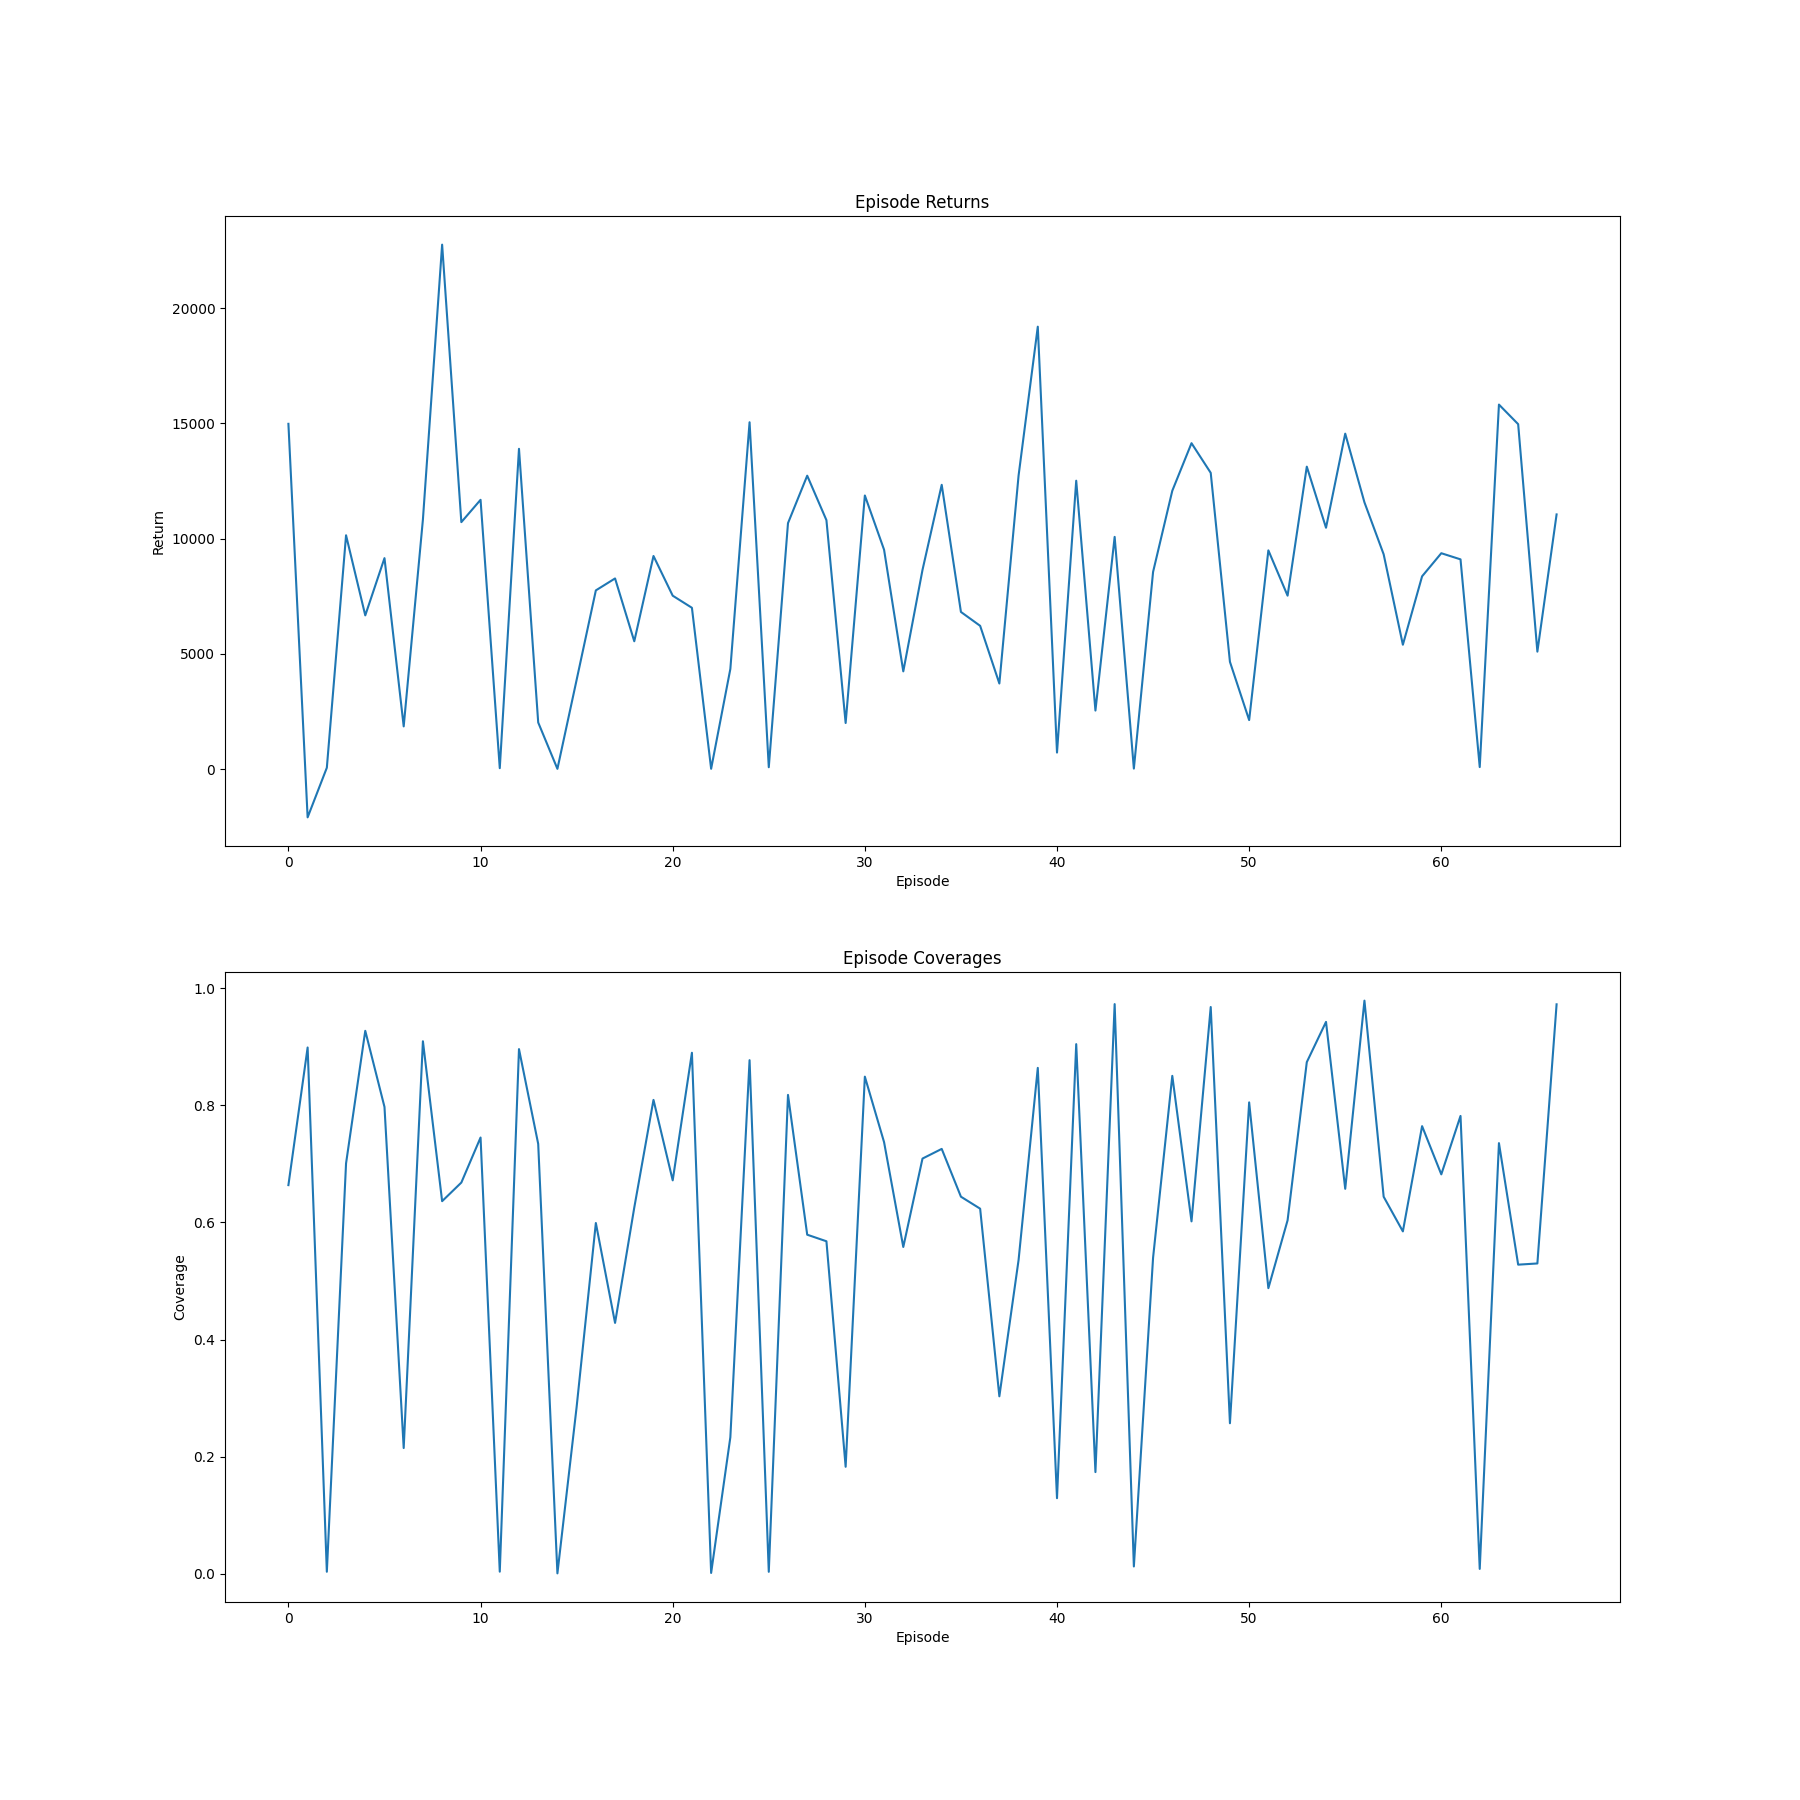

In [27]:
# plot returns and coverages
fig, ax = plt.subplots(2,1, figsize=(18,18))
ax[0].plot(returns_no_artifacts)
ax[0].set_title('Episode Returns')
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Return')
ax[1].plot(coverages_no_artifacts)
ax[1].set_title('Episode Coverages')
ax[1].set_xlabel('Episode')
ax[1].set_ylabel('Coverage')
plt.show()

In [6]:
print(f'Median coverage: {np.median(coverages)}')
print(f"Max coverage: {np.max(coverages)}")
print(f'Median return: {np.median(returns)}')
print(f'Max return: {np.max(returns)}')

Median coverage: 0.43293091654777527
Max coverage: 0.9641387462615967
Median return: 6371.97998046875
Max return: 36881.5625


In [28]:
print(f'Median coverage: {np.median(coverages_no_artifacts)}')
print(f"Max coverage: {np.max(coverages_no_artifacts)}")
print(f'Median return: {np.median(returns_no_artifacts)}')
print(f'Max return: {np.max(returns_no_artifacts)}')

Median coverage: 0.6574110388755798
Max coverage: 0.9786780476570129
Median return: 9100.7919921875
Max return: 22753.162109375


In [71]:
for i,c in enumerate(coverages):
    if c > 0.8:
        print(f'{i}, {c}')

2, 0.8166238069534302
25, 0.8895599842071533
45, 0.9374555945396423
49, 0.9217171669006348
55, 0.9641387462615967
65, 0.845698893070221


In [65]:
for i,c in enumerate(coverages_no_artifacts):
    if c > 0.8:
    # if i in [2,25,45,49,55,65]:
        print(f'{i}, {c}')


1, 0.8986878991127014
4, 0.9271636605262756
7, 0.9093305468559265
12, 0.8959121704101562
19, 0.80922931432724
21, 0.88968825340271
24, 0.8770492076873779
26, 0.8177570104598999
30, 0.8488835692405701
39, 0.86388099193573
41, 0.9044179916381836
43, 0.9727626442909241
46, 0.8502572178840637
48, 0.9678030014038086
50, 0.8049900531768799
53, 0.8736990094184875
54, 0.9423868060112
56, 0.9786780476570129
66, 0.9723880887031555


In [9]:
ep_snapshots_no_artifacts_path = '/home/bgray/bmap/data/neurotrack_outputs/episode_snapshots_neurom_no_artifacts_01-26-25/'
ep_snapshots_with_artifacts_path = '/home/bgray/bmap/data/neurotrack_outputs/episode_snapshots_neurom_with_artifacts_01-26-25/'
ep_snapshots_with_artifacts_files = sorted([f for x in os.walk(ep_snapshots_with_artifacts_path) for f in glob(os.path.join(x[0], '*.pt'))])
ep_snapshots_no_artifacts_files = sorted([f for x in os.walk(ep_snapshots_no_artifacts_path) for f in glob(os.path.join(x[0], '*.pt'))])
# i = 0
# file_no_artifacts = ep_snapshots_no_artifacts_files[i]
# file_with_artifacts = ep_snapshots_with_artifacts_files[i]
# snapshot_no_artifacts = torch.load(file_no_artifacts)
# snapshot_with_artifacts = torch.load(file_with_artifacts)

In [91]:
plt.close('all')

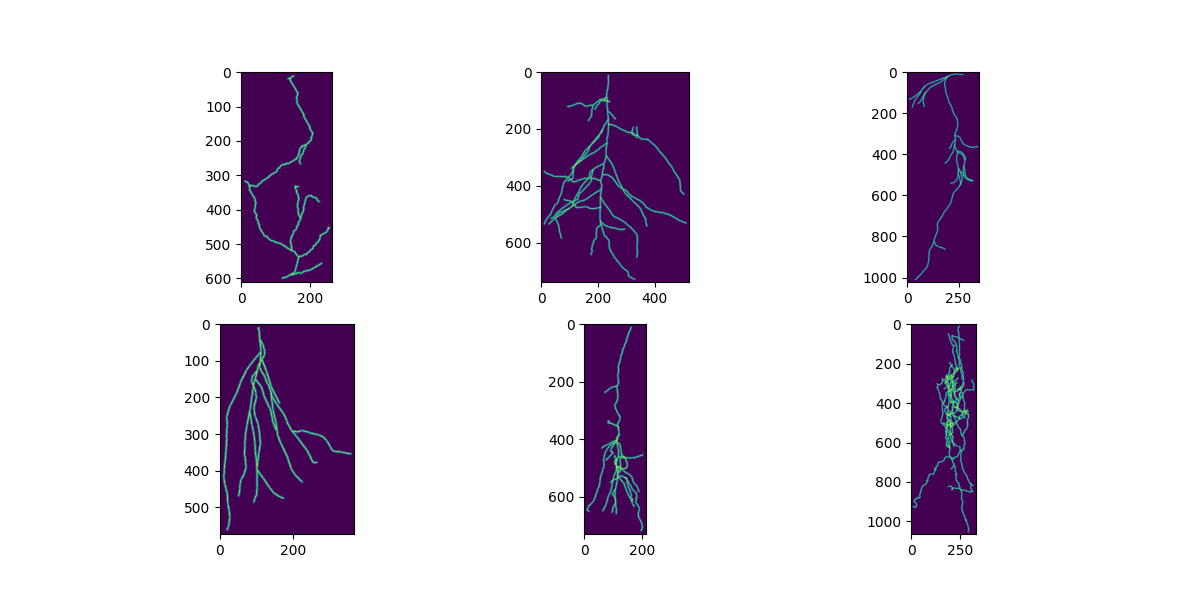

In [23]:
true_neurons = []
for i in [2,25,45,49,55,65]:
    file_with_artifacts = ep_snapshots_with_artifacts_files[i]
    snapshot_with_artifacts = torch.load(file_with_artifacts)
    true_neurons.append(snapshot_with_artifacts['true_neuron'])

fig, ax = plt.subplots(2,3, figsize=(12,6))
ax = ax.ravel()
for i,img in enumerate(true_neurons):
    ax[i].imshow(img.amax(0))

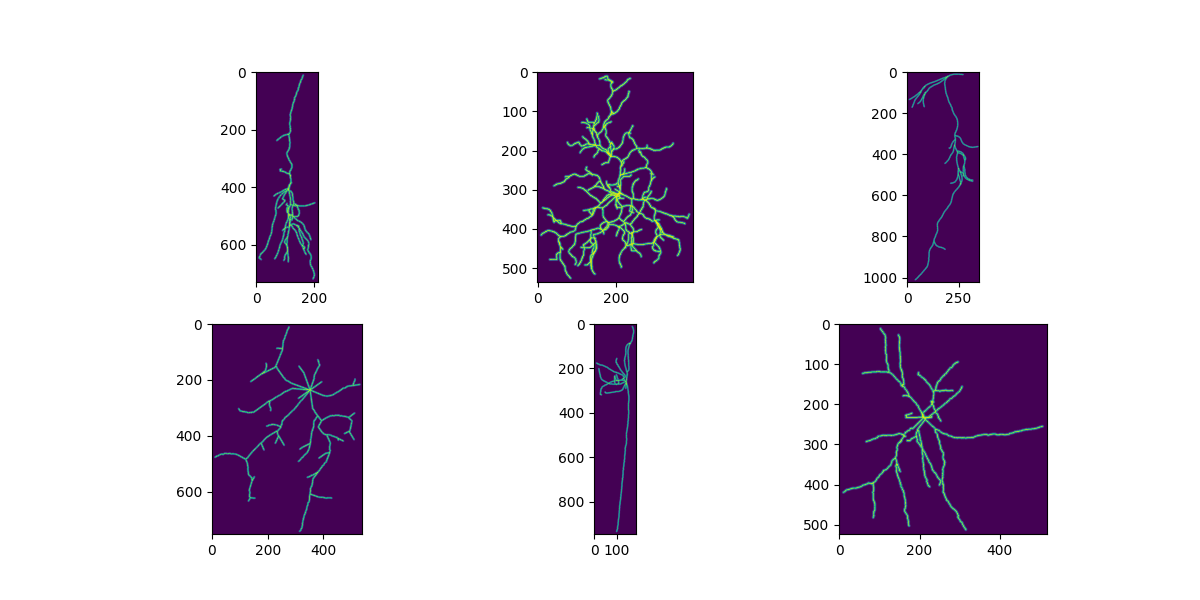

In [84]:
true_neurons = []
k=54
for i in range(k,k+6):
    file_no_artifacts = ep_snapshots_no_artifacts_files[i]
    snapshot_no_artifacts = torch.load(file_no_artifacts)
    true_neurons.append(snapshot_no_artifacts['true_neuron'])

fig, ax = plt.subplots(2,3, figsize=(12,6))
ax = ax.ravel()
for i,img in enumerate(true_neurons):
    ax[i].imshow(img.amax(0))

In [132]:
path = '/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts'
files = [f for x in os.walk(path) for f in glob(os.path.join(x[0], '*sections.tif'))]

k = 0
imgs = []
for i in range(k, k+6):
    img = tf.imread(files[i])
    imgs.append(img)

# fig, ax = plt.subplots(2,3, figsize=(12,6))
# ax = ax.ravel()
# for i,img in enumerate(imgs):
#     ax[i].imshow(img.max(0))

/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts/646805498_transformed/646805498_transformed_sections.tif
/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts/150304_2_3_d/150304_2_3_d_sections.tif
/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts/20160916_BGUG_HuC_ltRFP_d7_F13/20160916_BGUG_HuC_ltRFP_d7_F13_sections.tif
/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts/35dpi_ipsi_infra_06/35dpi_ipsi_infra_06_sections.tif
/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts/dHSN_02l/dHSN_02l_sections.tif
/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts/Bub_9-13_c1/Bub_9-13_c1_sections.tif


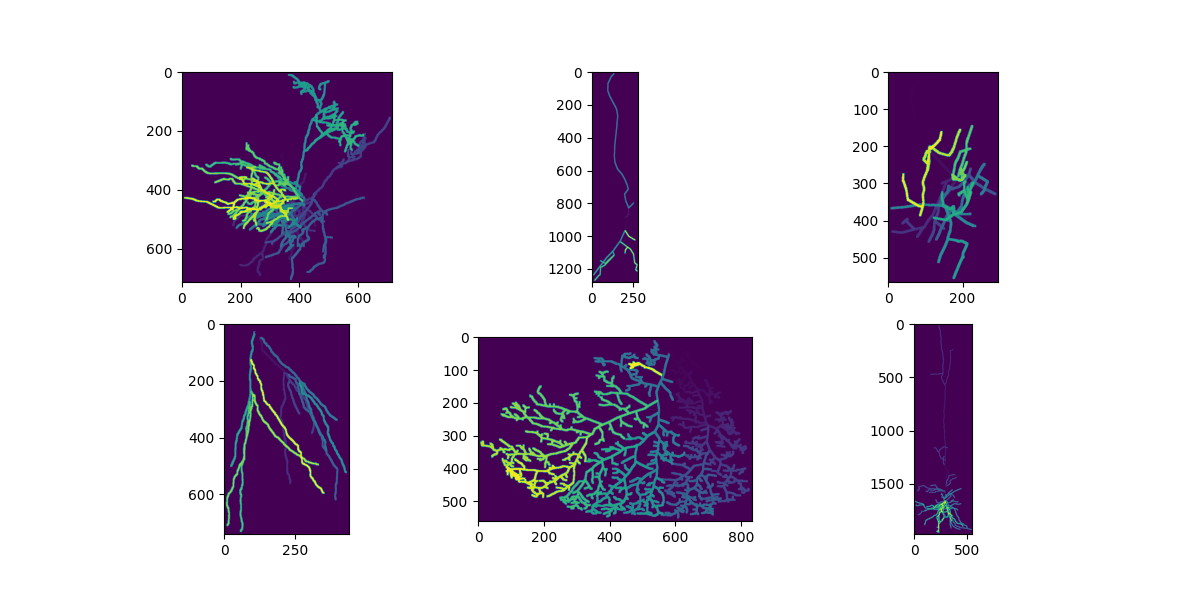

In [133]:
for f in files[k:k+6]:
    print(f)
fig, ax = plt.subplots(2,3, figsize=(12,6))
ax = ax.ravel()
for i,img in enumerate(imgs):
    ax[i].imshow(img[0].max(0))

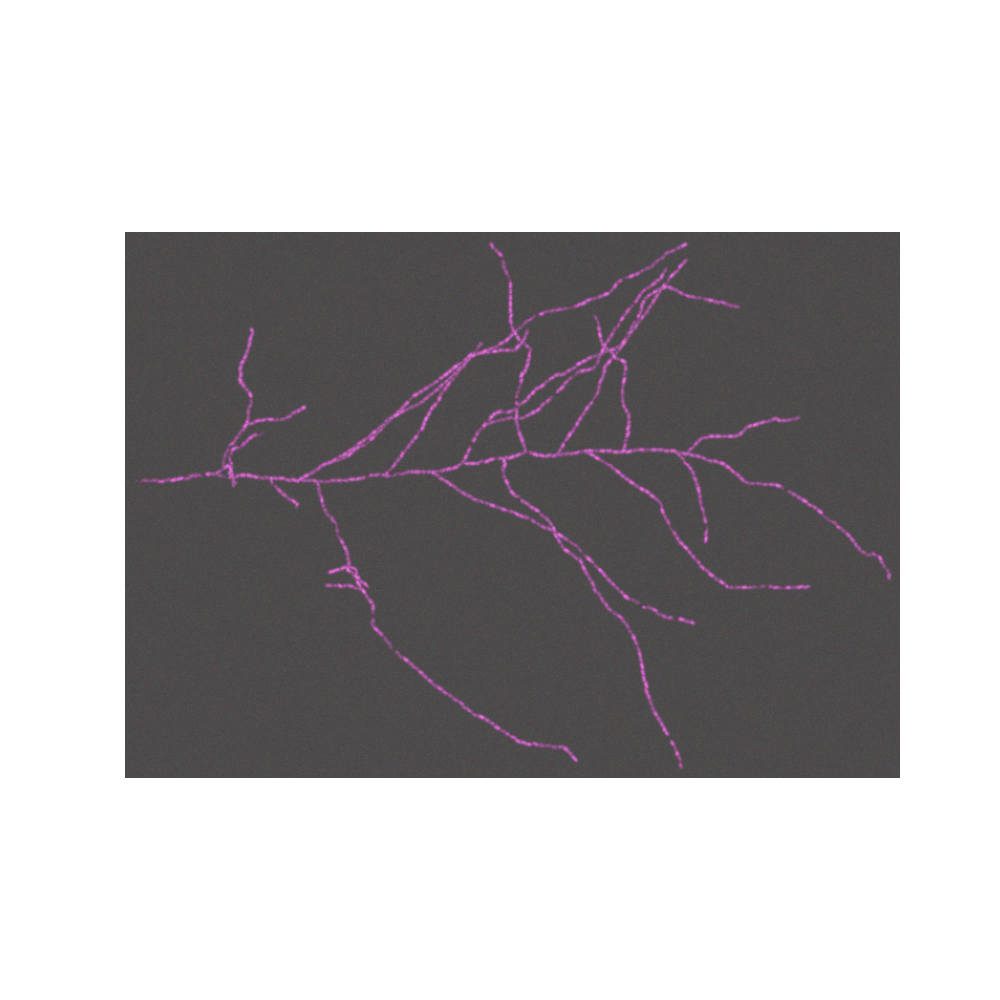

In [22]:
img_path = '/home/bgray/bmap/data/simulated_neurons/neuromorpho_with_artifacts/WT_6mo_3_11/WT_6mo_3_11_image.tif'

img = tf.imread(img_path)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img.transpose(1,3,2,0).max(0))
ax.set_axis_off()


In [ ]:
# get matching SWC

swc_file = [f for x in os.walk('/nafs/dtward/bryson/data/neuromorpho') for f in glob(os.path.join(x[0], '*swc')) if f.split('/')[-1].split('.')[0] == 'ABL-OE-14--ims'][0]
# swc_file = [f for x in os.walk('/nafs/dtward/bryson/data/neuromorpho') for f in glob(os.path.join(x[0], '*swc')) if f.split('/')[-1].split('.')[0] == 'WT_6mo_3_11'][0]


In [4]:
# draw a neuron without artifacts from swc_file


swc_list = load.swc(swc_file)

swc_data = draw.neuron_from_swc(swc_list,
                                width=3,
                                noise=0.00,
                                dropout=False,
                                adjust=True,
                                background_color=None,
                                neuron_color=None,
                                random_brightness=False,
                                binary=False,
                                rng=None)

loading file: /nafs/dtward/bryson/data/neuromorpho/giniger/CNG version/ABL-OE-14--ims.CNG.swc


In [171]:
swc_data.keys()

dict_keys(['image', 'neuron_density', 'section_labels', 'branch_mask', 'seeds', 'scale', 'graph'])

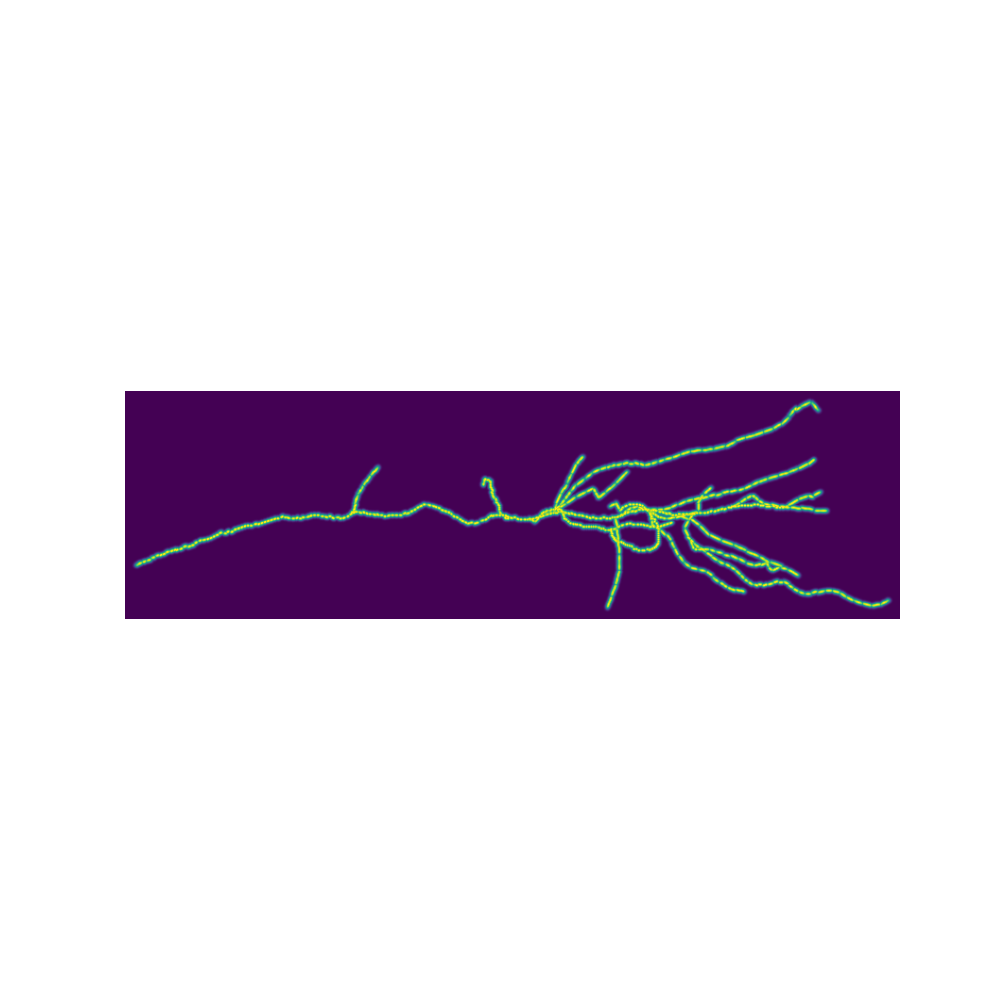

In [5]:
img = np.array(swc_data['neuron_density'])
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img.transpose(1,3,2,0).max(0))
ax.set_axis_off()

In [15]:
# fpath = '/nafs/dtward/bryson/data/simulated_neurons/neuromorpho_with_artifacts/WT_6mo_3_11/WT_6mo_3_11_density.tif'
# fpath = '/nafs/dtward/bryson/data/simulated_neurons/3d_with_artifacts_b-0/img_0/img_0_image.tif'
# density = tf.imread(fpath)
# density = density[0]

# fpath = ep_snapshots_no_artifacts_files[54]
fpath = ep_snapshots_with_artifacts_files[55]
data = torch.load(fpath)
labeled_neuron = data['labeled_neuron']
labeled_neuron = np.array(labeled_neuron)

In [163]:
seeds_file = '/nafs/dtward/bryson/data/simulated_neurons/3d_with_artifacts_b-0/img_0/img_0_seeds.txt'
with open(seeds_file, 'r') as f:
    seeds = [[int(x) for x in line.strip().split(' ')] for line in f if line.strip()]

In [18]:
data.keys()

dict_keys(['labeled_neuron', 'true_neuron', 'coverage', 'return'])

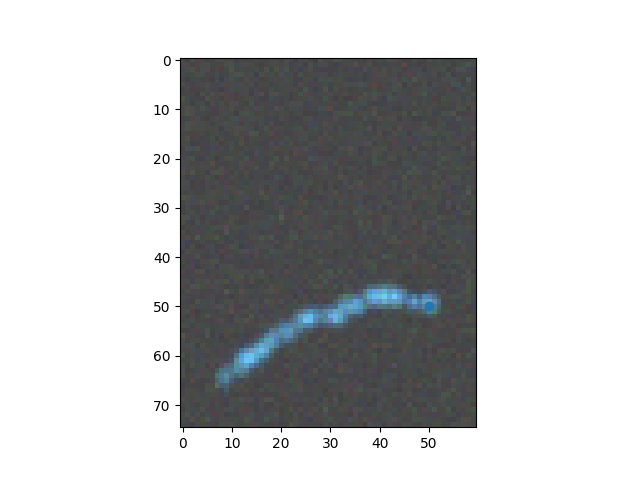

In [167]:
plt.figure()
plt.imshow(density.transpose(1,2,3,0).max(0))
plt.scatter(x=seeds[0][2],y=seeds[0][1])

In [6]:
density = np.array(swc_data['neuron_density'][0])

In [16]:
# Save density as a NIfTI file

# Create output directory if it doesn't exist
output_dir = '/home/bgray/bmap/data/simulated_neurons'

# Get the neuron name from the file path
# neuron_name = os.path.basename(fpath).split('_density.tif')[0]
neuron_name = 'ABL-OE-14--ims'
output_path = os.path.join(output_dir, f"{neuron_name}_labeled_with_artifacts.nii.gz")

# Create affine matrix (identity for now, can be adjusted if needed)
affine = np.eye(4)

# Create the NIfTI image and save it
nifti_img = nib.Nifti1Image(labeled_neuron, affine)
nib.save(nifti_img, output_path)

print(f"Density saved as NIfTI file at: {output_path}")

Density saved as NIfTI file at: /home/bgray/bmap/data/simulated_neurons/ABL-OE-14--ims_labeled_with_artifacts.nii.gz
